# 분포형 데이터 시각화

##(3) 예시

- penguins 데이터 정보
    - `species`: 펭귄의 종 (Adelie, Gentoo, Chinstrap)
    - `island`: 데이터가 수집된 섬 (Torgersen, Biscoe, Dream)
    - `bill_length_mm`: 부리 길이 (밀리미터)
    - `bill_depth_mm`: 부리 깊이 (밀리미터)
    - `flipper_length_mm`: 날개 길이 (밀리미터)
    - `body_mass_g`: 체중 (그램)
    - `sex`: 성별 (Male, Female)
    - `year`: 데이터 수집 연도

In [ ]:
# 데이터 로드 및 임포트
!pip install seaborn
!pip install matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguin_df = sns.load_dataset('penguins')

## **Histogram**

### 주요 특징

- **데이터의 분포 파악**
    - 데이터의 분포를 시각적으로 파악하는데 효과적이다.
    - 데이터가 정규분포를 따르는지 아니면 분포가 편향적인지 간단히 확인할 수 있다.
- **데이터 밀도**
    - 히스토그램 막대의 높이는 특정 구간의 데이터의 빈도를 나타낸다.
- **히스토그램 빈(bin)**
    - 데이터 범위를 일정한 간격으로 나눈 구역을 의미한다. 하나의 bin은 하나의 막대를 나타낸다.
    - bin의 너비는 히스토그램의 구간을 정의하고, 설정한 bin의 수에 따라 bin의 너비가 결정된다.
- **적합한 데이터**
    - 연속형 데이터(시험 점수, 키와 몸무게 등)

---
### 한계

- **bin**
    - 빈(bin)의 개수와 너비를 어떻게 선택할지에 따라 시각화 결과가 달라지므로 적절한 빈 크기와 개수를 선택하는 것이 중요하다.
- **데이터 손실**
    - 히스토그램은 데이터를 빈(막대)에 할당하므로 원본 데이터의 일부 정보가 손실될 수 있다.
- **이상치**
    - 이상치가 있는 경우, 히스토그램은 이상치에 대한 정확한 정보를 제공하지 못할 수 있다.
- **비연속적 데이터에 제한**
    - 히스토그램은 주로 연속적인 데이터에 사용되며, 비연속적인 데이터에는 적합하지 않다.

<Axes: xlabel='bill_length_mm', ylabel='Count'>

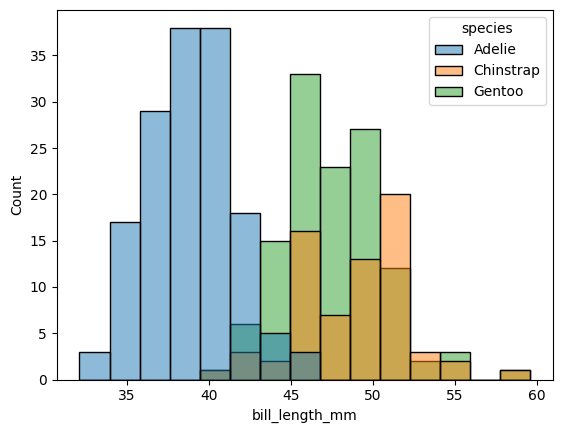

In [ ]:
# 종으로 구분한 날개 길이
sns.histplot(
    data = penguin_df,
    x = 'bill_length_mm',
    bins = 15, # 히스토그램 막대갯수 설정
    hue = 'species' # 어떤 칼럼으로 나눠 볼것인가
    # multiple
    # layar :
    # stack : 쌓아서 구분
    # dodge : 옆으로 나란히
    # fill : 각 범주의 막대 높이를 비율로 표현
)

## KDE Plot

### (1) 주요 특징

- **부드러운 시각화**
    - 히스토그램과 달리 데이터 분포도를 부드러운 곡선으로 표현한다.
    - 부드러운 곡선 표현 덕분에 데이터의 전체 경향을 쉽게 알 수 있다.
- **커널 밀도 추정(Kernel Density Estimation) 기반**
    - 커널 함수를 각 데이터 포인트에 적용하여 밀도를 계산하고, 데이터의 분포를 추정한다.
- **대역폭(Bandwidth) 조정**
    - `bw_adjust` 인자의 값으로 그래프의 부드러움 정도를 조절할 수 있다.
    - 작은 대역폭 : 곡선이 날카롭고 세밀하다.
    - 큰 대역폭 : 곡선이 부드럽고 덜 세밀하다.
- 적합한 데이터
    - 연속형 데이터

<Axes: xlabel='bill_length_mm', ylabel='Density'>

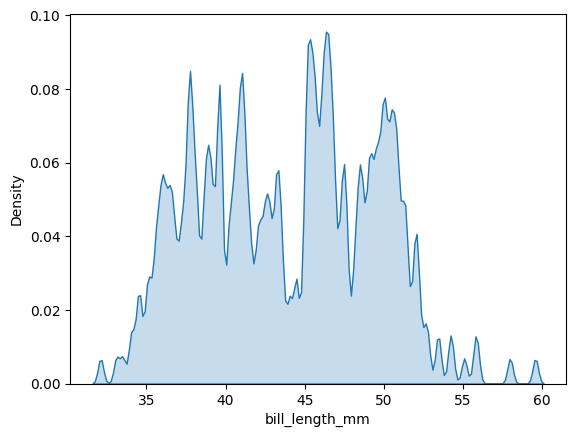

In [ ]:
# 펭귄의 종에 따른 날개 길이 분포 KDE Plot

sns.kdeplot(
    data = penguin_df,
    x = 'bill_length_mm',
    fill = True,
    bw_adjust = 0.1 # 대역폭 : 커지면 부드럽고 작아지면 급해진다
)

## [3] Rug Plot

### (1) 주요 특징

- **데이터 분포의 직접적 표현**
    - 짧은 선을 통해 데이터 분포를 직접적으로 표현한다.
    - 히스토그램이나 KDE처럼 밀도를 추정하지 않고, 데이터를 표현한다.
- **다른 Plot과 조합**
    - Rug plot은 단독 사용보다는 히스토그램, KDE 등과 함께 사용되어 데이터의 분포를 명확하게 표현한다.

---
### 한계

- **과밀한 데이터 표시 문제**
    - 데이터 포인트가 많거나 매우 밀집된 경우, 개별 데이터가 겹쳐져서 해석이 어려워진다.
    - 이로 인해 특정 데이터 범위에서의 밀집도를 정확하게 파악하기 어려울 수 있다.
- **변수 간의 관계 시각화 부족**
    - 단일 변수의 분포를 시각화하는 데 초점을 맞추기 때문에 변수간의 관계를 파악하기 어렵다.
- **추세 및 패턴 파악의 어려움**
    - 데이터 포인트를 개별적으로 표시하기 때문에 데이터의 전반적인 경향을 파악하기 어렵다.
    - 이를 보완하기 위해 기타 시각화를 함께 사용하는 것이 좋다.

<Axes: xlabel='flipper_length_mm'>

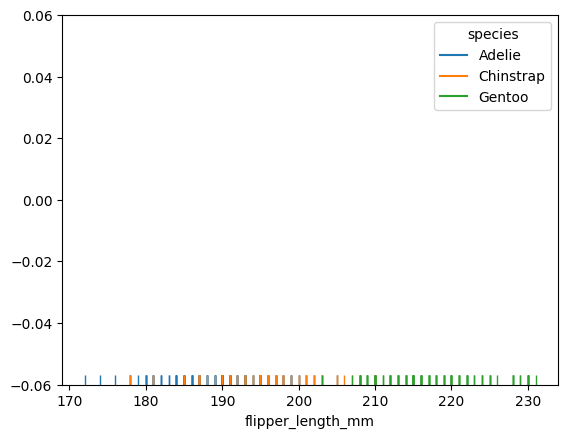

In [ ]:
sns.rugplot(
    data = penguin_df,
    x = "flipper_length_mm",
    hue = "species",
)

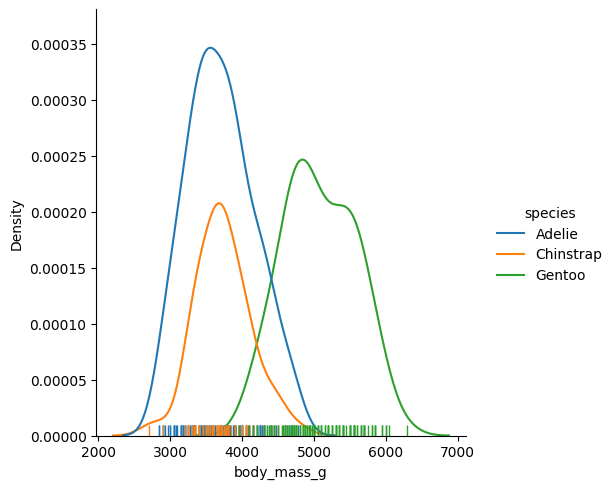

In [ ]:
# 분포형 그래프의 부모 함수
sns.displot(
    data = penguin_df,
    x = 'body_mass_g',
    hue = 'species',
    kind = 'kde', # 히스토그램, kde, rug
    rug = True
)